In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Taking a look at the structure of the dataset

In [14]:
crime = pd.read_csv('crime.csv')

In [15]:
crime.shape

(530652, 12)

In [42]:
for col in crime.columns: 
    print(col) 

TYPE
YEAR
MONTH
DAY
HOUR
NEIGHBOURHOOD
Latitude
Longitude


Dropping these specified columns as we won't be using them in our analyses

In [24]:
crime.drop(['MINUTE', 'HUNDRED_BLOCK', 'X','Y'], axis = 1, inplace = True)

Creating a dataframe to only look at crimes in the Central Business District in Vancouver, sorted by YEAR from oldest to newest.

In [144]:
CBD_crime = crime.loc[crime['NEIGHBOURHOOD'] == 'Central Business District', :].sort_values(['YEAR'])

In [145]:
CBD_crime.TYPE.value_counts()

Theft from Vehicle                                        48003
Other Theft                                               19244
Mischief                                                  16672
Break and Enter Commercial                                 9371
Theft of Bicycle                                           6907
Theft of Vehicle                                           4016
Break and Enter Residential/Other                          3505
Vehicle Collision or Pedestrian Struck (with Injury)       3188
Vehicle Collision or Pedestrian Struck (with Fatality)       41
Name: TYPE, dtype: int64

Making a DATE variable combining YEAR, MONTH and DAY

In [146]:
CBD_crime['DATE'] = pd.to_datetime({'year': CBD_crime['YEAR'], 'month': CBD_crime['MONTH'], 'day': CBD_crime['DAY']})
CBD_crime = CBD_crime.sort_values(['DATE'])
CBD_crime.index = pd.DatetimeIndex(CBD_crime['DATE'])
CBD_crime.head(5)

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DATE
DATE,,,,,,,,,
2003-01-01,Theft of Bicycle,2003,1,1,0.0,Central Business District,49.279617,-123.106816,2003-01-01
2003-01-01,Theft from Vehicle,2003,1,1,0.0,Central Business District,49.281502,-123.107467,2003-01-01
2003-01-01,Theft from Vehicle,2003,1,1,21.0,Central Business District,49.279159,-123.113100,2003-01-01
2003-01-01,Theft from Vehicle,2003,1,1,2.0,Central Business District,49.280028,-123.117906,2003-01-01
2003-01-01,Theft from Vehicle,2003,1,1,16.0,Central Business District,49.282390,-123.103232,2003-01-01


Since the dataset doesn't contain the full month of 2017-07 I'm going to get rid of all observations past this point.
I'm extracting the last 5 rows to make sure that there are no more dates with 2017-07

In [147]:
CBD_crime = CBD_crime[CBD_crime.DATE < '2017-07-01']
CBD_crime.iloc[-5:]

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DATE
DATE,,,,,,,,,
2017-06-30,Other Theft,2017,6,30,5.0,Central Business District,49.276141,-123.127610,2017-06-30
2017-06-30,Break and Enter Commercial,2017,6,30,0.0,Central Business District,49.275941,-123.114966,2017-06-30
2017-06-30,Theft from Vehicle,2017,6,30,1.0,Central Business District,49.282346,-123.102225,2017-06-30
2017-06-30,Other Theft,2017,6,30,13.0,Central Business District,49.284157,-123.117101,2017-06-30
2017-06-30,Theft from Vehicle,2017,6,30,18.0,Central Business District,49.279286,-123.120877,2017-06-30


Theres a significant outlier some time in 2011, lets find out which day that was so we can better look at the normal data

Now i'm going to make some visualizations for the crime in the Central Business District over the years.

    Total Crime per Year
    Total Crime per Month
    Total Crime per Day
    Type of Crime per Year
    Type of Crime per Month 
    Heatmap of Total Crime per Day of the Year

In [189]:
CBD_crime.resample('D').size().idxmax()
CBD_crime = CBD_crime[CBD_crime.DATE != '2011-06-15']

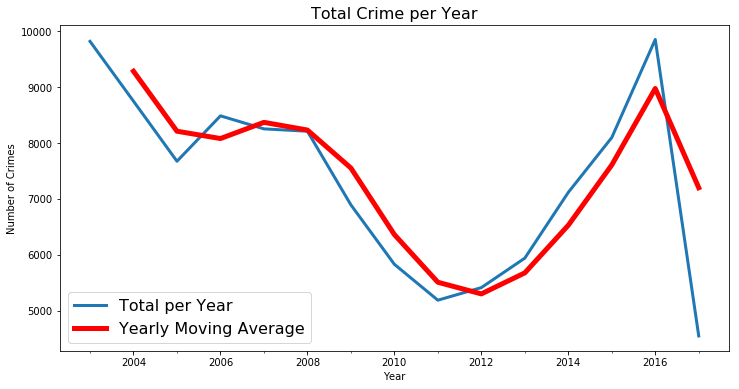

In [218]:
CBD_crime.resample('Y')['TYPE'].count().plot(figsize=(12,6), linewidth=3,label='Total per Year')
CBD_crime.resample('Y').size().rolling(window=2).mean().plot(color='red', linewidth=5, label='Yearly Moving Average')

plt.title('Total Crime per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':16})


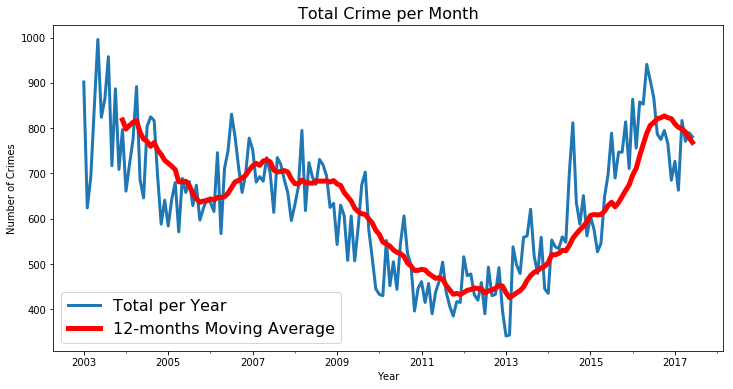

In [219]:
CBD_crime.resample('M')['TYPE'].count().plot(figsize=(12,6), linewidth=3,label='Total per Year')
CBD_crime.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

plt.title('Total Crime per Month', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':16})

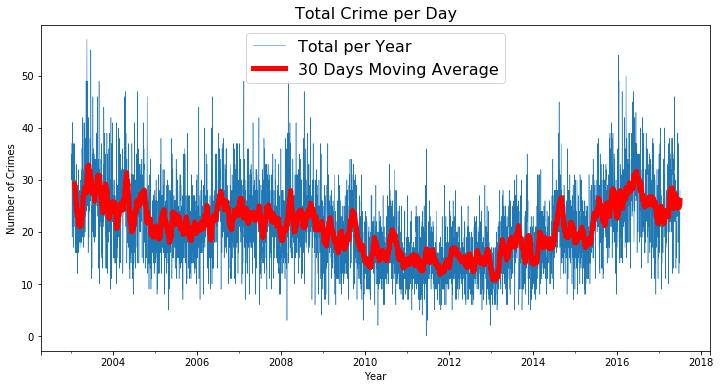

In [254]:
CBD_crime.resample('D')['TYPE'].count().plot(figsize=(12,6), linewidth=0.5,label='Total per Year')
CBD_crime.resample('D').size().rolling(window=30).mean().plot(color='red', linewidth=5, label='30 Days Moving Average')

plt.title('Total Crime per Day', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':16})

Now i'm going to turn certain categories in TYPES of crime to certain groups

In [222]:
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'
    
CBD_crime['CATEGORY'] = CBD_crime['TYPE'].apply(category)


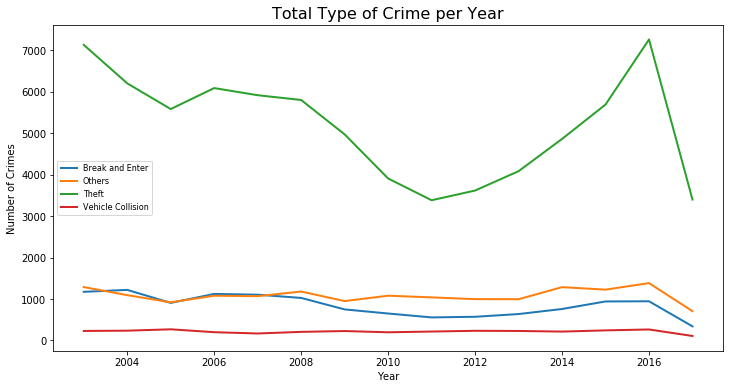

In [253]:
CBD_crime.groupby(['YEAR','CATEGORY'])['DATE'].count().unstack().plot(figsize=(12,6), linewidth=2,label='Total per Year')
plt.title('Total Type of Crime per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})


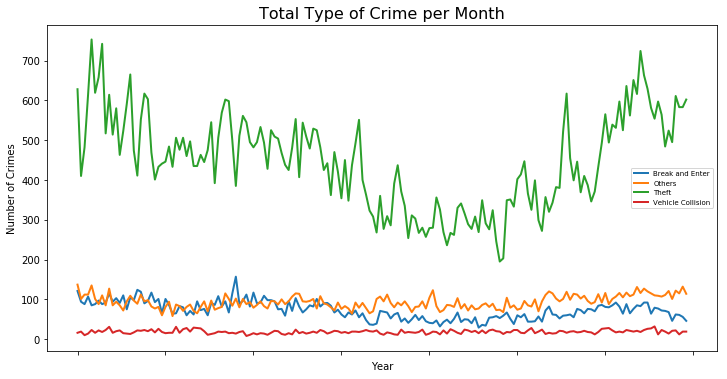

In [272]:
CBD_crime.groupby(['YEAR','MONTH','CATEGORY'])['DATE'].count().unstack().plot(figsize=(12,6), linewidth=2,label='Total per Year')
plt.title('Total Type of Crime per Month', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

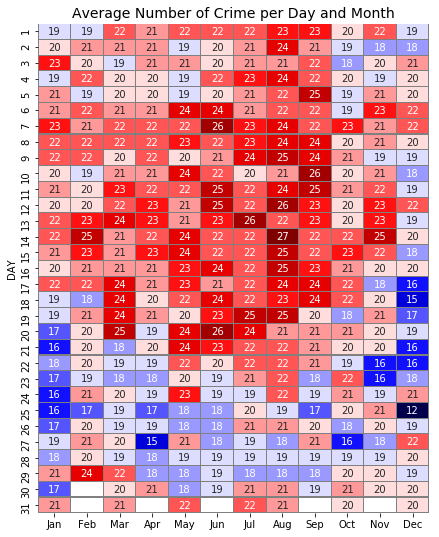

In [283]:
CBD_crime_pt = CBD_crime.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
CBD_crime_pt_year_count = CBD_crime.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
CBD_crime_average = CBD_crime_pt/CBD_crime_pt_year_count
CBD_crime_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Average Number of Crime per Day and Month', fontsize=14)
sns.heatmap(CBD_crime_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f");

From this graph, some interesting things are that more crime seems to occur during the earlier days of the summer months. Also the lowest reported crime is on christmas day